Correlations between different steps

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator
from pyprojroot.here import here
from scipy import stats

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 50)
df = pd.read_csv(here("fit/input/all-trajectories.csv"))
print(len(df))

df.head()

29119


,contribs,contribs_with_corr,current,dblp,department,facultyName,first_asst_job_rank,first_asst_job_year,has_postdoc,is_female,num_asst_jobs,phd_rank,phd_year,place,pubs,pubs_adj,pubs_with_corr,pubs_with_corr_adj,recordDate,year,CareerAge,dblp_id,pubs_adj_round,pubs_adj_next,pubs_adj_next2,q_adj_delta,q_adj_next_delta,cumpubs,YearSinceDegree,CareerAgeZero
0,1.444444,1.444444,Associate Professor,=Ccedil=etintemel:Ugur,Computer Science,Ugur Cetintemel,21.92,2001,False,False,1,28.65,2001.0,Brown University,4,6.691238,4,6.691238,6/6/11,2002,1,=Ccedil=etintemel:Ugur2001.0,7.0,12.901876,4.667694,6.210638,-8.234182,24.892491,1.0,0
1,1.433135,1.433135,Associate Professor,=Ccedil=etintemel:Ugur,Computer Science,Ugur Cetintemel,21.92,2001,False,False,1,28.65,2001.0,Brown University,8,12.901876,8,12.901876,6/6/11,2003,2,=Ccedil=etintemel:Ugur2001.0,13.0,4.667694,12.016541,-8.234182,7.348847,37.794367,2.0,1
2,1.083333,1.083333,Associate Professor,=Ccedil=etintemel:Ugur,Computer Science,Ugur Cetintemel,21.92,2001,False,False,1,28.65,2001.0,Brown University,3,4.667694,3,4.667694,6/6/11,2004,3,=Ccedil=etintemel:Ugur2001.0,5.0,12.016541,11.608251,7.348847,-0.408290,42.462062,3.0,2
3,2.103846,2.103846,Associate Professor,=Ccedil=etintemel:Ugur,Computer Science,Ugur Cetintemel,21.92,2001,False,False,1,28.65,2001.0,Brown University,8,12.016541,8,12.016541,6/6/11,2005,4,=Ccedil=etintemel:Ugur2001.0,12.0,11.608251,7.012981,-0.408290,-4.595270,54.478603,4.0,3
4,1.900000,1.900000,Associate Professor,=Ccedil=etintemel:Ugur,Computer Science,Ugur Cetintemel,21.92,2001,False,False,1,28.65,2001.0,Brown University,8,11.608251,8,11.608251,6/6/11,2006,5,=Ccedil=etintemel:Ugur2001.0,12.0,7.012981,8.139514,-4.595270,1.126533,66.086854,5.0,4


In [5]:
def assign_quantiles(group, n=10):
    group['pubs_adj_quantile'] = pd.qcut(group['pubs_adj'], n, labels=False, duplicates='drop')
    return group

df['pubs_adj_next_round'] = df.pubs_adj_next.round()
df_deciles = df.groupby('pubs_adj_next_round').apply(assign_quantiles).dropna(subset=['pubs_adj_quantile'])
df_deciles['pubs_adj_quantile'] = df_deciles['pubs_adj_quantile'].astype(int) + 1

/var/folders/4x/w_cxwlr93hq30tjxqt6087bw0000gq/T/ipykernel_50145/2071076456.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_deciles = df.groupby('pubs_adj_next_round').apply(assign_quantiles).dropna(subset=['pubs_adj_quantile'])


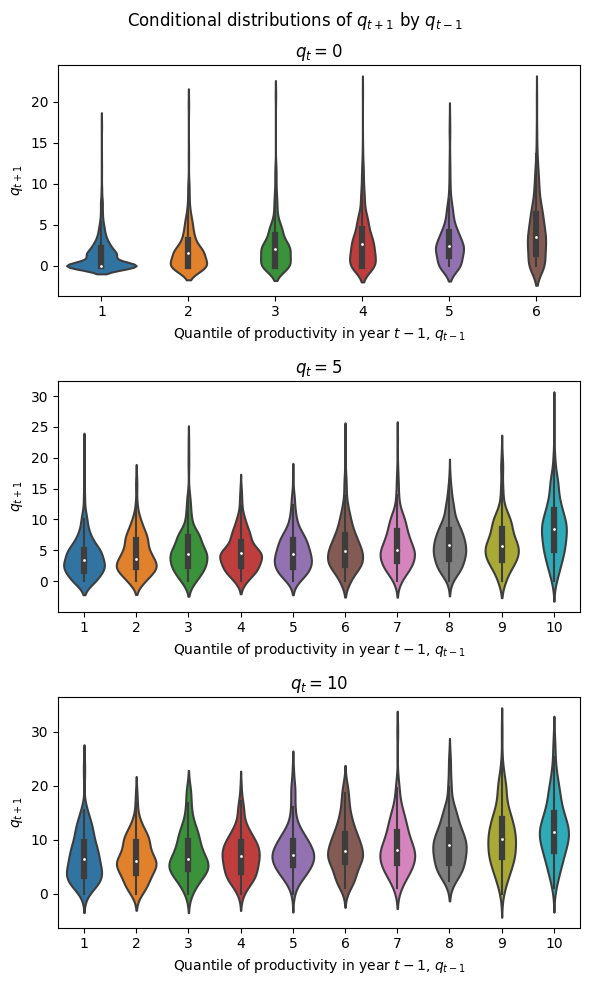

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

fig.suptitle("Conditional distributions of $q_{t+1}$ by $q_{t-1}$")

ax = axes[0]
sns.violinplot(df_deciles[(df_deciles.pubs_adj_next.round() == 0)], x='pubs_adj_quantile', y='pubs_adj_next2', lowess=True, ax=ax)
ax.set_xlabel("Quantile of productivity in year $t-1$, $q_{t-1}$")
ax.set_ylabel("$q_{t+1}$")
ax.set_title("$q_t=0$")

ax = axes[1]
sns.violinplot(df_deciles[(df_deciles.pubs_adj_next.round() == 5)], x='pubs_adj_quantile', y='pubs_adj_next2', lowess=True, ax=ax)
ax.set_xlabel("Quantile of productivity in year $t-1$, $q_{t-1}$")
ax.set_ylabel("$q_{t+1}$")
ax.set_title("$q_{t}=5$")

ax = axes[2]
sns.violinplot(df_deciles[(df_deciles.pubs_adj_next.round() == 10)], x='pubs_adj_quantile', y='pubs_adj_next2', lowess=True, ax=ax)
ax.set_xlabel("Quantile of productivity in year $t-1$, $q_{t-1}$")
ax.set_ylabel("$q_{t+1}$")
ax.set_title("$q_{t}=10$")

plt.tight_layout()
plt.savefig(here("fit/output/conditional_distributions.pdf"), bbox_inches="tight")